In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
crop = pd.read_csv("Crop_recommendation.csv")  # Change path if needed

# Encode labels to numeric values
crop_dict = {
    'rice': 1, 'maize': 2, 'jute': 3, 'cotton': 4, 'coconut': 5, 'papaya': 6,
    'orange': 7, 'apple': 8, 'muskmelon': 9, 'watermelon': 10, 'grapes': 11,
    'mango': 12, 'banana': 13, 'pomegranate': 14, 'lentil': 15, 'blackgram': 16,
    'mungbean': 17, 'mothbeans': 18, 'pigeonpeas': 19, 'kidneybeans': 20,
    'chickpea': 21, 'coffee': 22
}
crop['crop_num'] = crop['label'].map(crop_dict)
crop.drop('label', axis=1, inplace=True)

# Train-test split
from sklearn.model_selection import train_test_split
x = crop.drop('crop_num', axis=1)
y = crop['crop_num']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Feature scaling(used to normalize or standardize the range of independent variables or features in a dataset)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Train multiple models and print accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'SVC': SVC(),
    'KNeighbors': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'ExtraTree': ExtraTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

print("Model Accuracy Scores:")
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: {acc:.4f}")

# Final model (Random Forest)
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

# Crop dictionary reverse lookup
crop_dict_reverse = {v: k.capitalize() for k, v in crop_dict.items()}

# Prediction function
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    features = scaler.transform(features)  # scale the input
    prediction = rfc.predict(features)
    return prediction[0]

# Take user input
print("\nEnter values for prediction:")
N = float(input("Enter Nitrogen content (N): "))
P = float(input("Enter Phosphorus content (P): "))
K = float(input("Enter Potassium content (K): "))
temperature = float(input("Enter Temperature (°C): "))
humidity = float(input("Enter Humidity (%): "))
ph = float(input("Enter pH value: "))
rainfall = float(input("Enter Rainfall (mm): "))

# Predict and display result
predicted_crop_id = recommendation(N, P, K, temperature, humidity, ph, rainfall)
predicted_crop_name = crop_dict_reverse.get(predicted_crop_id, "Unknown Crop")

print(f"\n Recommended Crop: {predicted_crop_name}")

Model Accuracy Scores:
LogisticRegression: 0.9636
GaussianNB: 0.9955
SVC: 0.9682
KNeighbors: 0.9591
DecisionTree: 0.9864
ExtraTree: 0.9091
RandomForest: 0.9932
Bagging: 0.9886
GradientBoosting: 0.9818
AdaBoost: 0.1455

Enter values for prediction:
Enter Nitrogen content (N): 30
Enter Phosphorus content (P): 75
Enter Potassium content (K): 81
Enter Temperature (°C): 19.4
Enter Humidity (%): 16.8
Enter pH value: 6.4
Enter Rainfall (mm): 68.5

 Recommended Crop: Chickpea


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Average Ratio of Nitrogen in the Soil : 50.55
Average Ratio of Phosphorous in the Soil : 53.36
Average Ratio of Potassium in the Soil : 48.15
Average Temperature in Celsius : 25.62
Average Relative Humidity in % : 71.48
Average PH Value of the soil : 6.47
Average Rainfall in mm : 103.46

Summary for rice
---------------------------------------------
Statistics for Nitrogen
Min : 60 Avg : 79.89 Max : 99
---------------------------------------------
Statistics for Phosphorous
Min : 35 Avg : 47.58 Max : 60
---------------------------------------------
Statistics for Potassium
Min : 35 Avg : 39.87 Max : 45
---------------------------------------------
Statistics for Temperature
Min : 20.05, Avg : 23.69, Max : 26.93
---------------------------------------------
Statistics for Humidity
Min : 80.12, Avg : 82.27, Max : 84.97
---------------------------------------------
Statistics for PH
Min : 5.01, Avg : 6.43, Max : 7.87
---------------------------------------------
Statistics for Rainfall
Mi

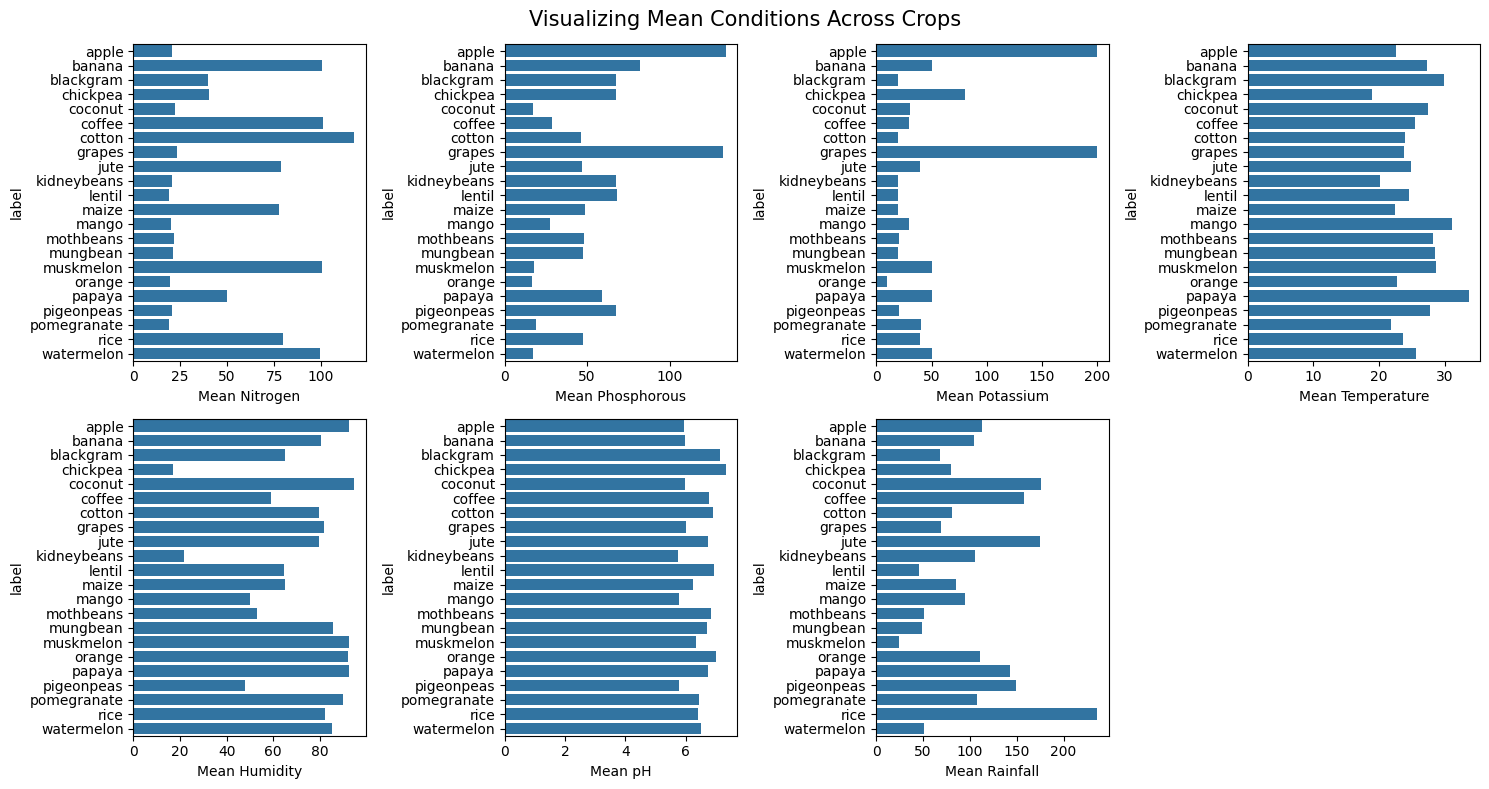

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Load the dataset
df = pd.read_csv("Crop_recommendation.csv")

# Descriptive Statistics: Summary for all crops
print("Average Ratio of Nitrogen in the Soil : {0:.2f}".format(df['N'].mean()))
print("Average Ratio of Phosphorous in the Soil : {0:.2f}".format(df['P'].mean()))
print("Average Ratio of Potassium in the Soil : {0:.2f}".format(df['K'].mean()))
print("Average Temperature in Celsius : {0:.2f}".format(df['temperature'].mean()))
print("Average Relative Humidity in % : {0:.2f}".format(df['humidity'].mean()))
print("Average PH Value of the soil : {0:.2f}".format(df['ph'].mean()))
print("Average Rainfall in mm : {0:.2f}".format(df['rainfall'].mean()))

# Summary Statistics for each Crop
def summary(crop):
    x = df[df['label'] == crop]
    print(f"\nSummary for {crop}")
    print("---------------------------------------------")
    print("Statistics for Nitrogen")
    print("Min :", x['N'].min(), "Avg :", x['N'].mean(), "Max :", x['N'].max())
    print("---------------------------------------------")
    print("Statistics for Phosphorous")
    print("Min :", x['P'].min(), "Avg :", x['P'].mean(), "Max :", x['P'].max())
    print("---------------------------------------------")
    print("Statistics for Potassium")
    print("Min :", x['K'].min(), "Avg :", x['K'].mean(), "Max :", x['K'].max())
    print("---------------------------------------------")
    print("Statistics for Temperature")
    print("Min : {0:.2f}, Avg : {1:.2f}, Max : {2:.2f}".format(x['temperature'].min(), x['temperature'].mean(), x['temperature'].max()))
    print("---------------------------------------------")
    print("Statistics for Humidity")
    print("Min : {0:.2f}, Avg : {1:.2f}, Max : {2:.2f}".format(x['humidity'].min(), x['humidity'].mean(), x['humidity'].max()))
    print("---------------------------------------------")
    print("Statistics for PH")
    print("Min : {0:.2f}, Avg : {1:.2f}, Max : {2:.2f}".format(x['ph'].min(), x['ph'].mean(), x['ph'].max()))
    print("---------------------------------------------")
    print("Statistics for Rainfall")
    print("Min : {0:.2f}, Avg : {1:.2f}, Max : {2:.2f}".format(x['rainfall'].min(), x['rainfall'].mean(), x['rainfall'].max()))

# Example: run summary for one crop
summary('rice')

# Aggregate means per crop for plotting
mean_values = df.groupby('label').mean().reset_index()

# 1. Visualize the impact of different agricultural conditions on crops using bar plots
plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(2, 4, 1)
sns.barplot(x='N', y='label', data=mean_values)
plt.xlabel('Mean Nitrogen', fontsize=10)

plt.subplot(2, 4, 2)
sns.barplot(x='P', y='label', data=mean_values)
plt.xlabel('Mean Phosphorous', fontsize=10)

plt.subplot(2, 4, 3)
sns.barplot(x='K', y='label', data=mean_values)
plt.xlabel('Mean Potassium', fontsize=10)

plt.subplot(2, 4, 4)
sns.barplot(x='temperature', y='label', data=mean_values)
plt.xlabel('Mean Temperature', fontsize=10)

plt.subplot(2, 4, 5)
sns.barplot(x='humidity', y='label', data=mean_values)
plt.xlabel('Mean Humidity', fontsize=10)

plt.subplot(2, 4, 6)
sns.barplot(x='ph', y='label', data=mean_values)
plt.xlabel('Mean pH', fontsize=10)

plt.subplot(2, 4, 7)
sns.barplot(x='rainfall', y='label', data=mean_values)
plt.xlabel('Mean Rainfall', fontsize=10)

plt.suptitle('Visualizing Mean Conditions Across Crops', fontsize=15)
plt.tight_layout()
plt.show()